In [17]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

Test de l'utilisation de THALES pour calculer le diamètre de la pièce avec les ombres

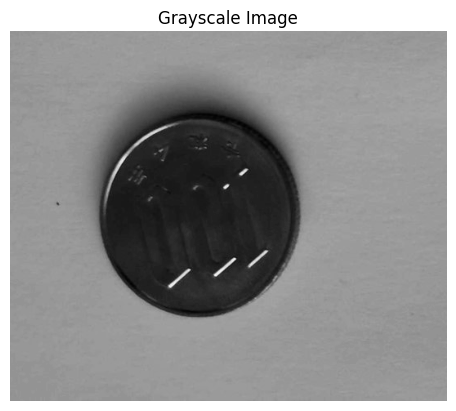

In [18]:
image_path = 'piece3.jpg'
image = cv2.imread(image_path)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

In [19]:
x, thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)


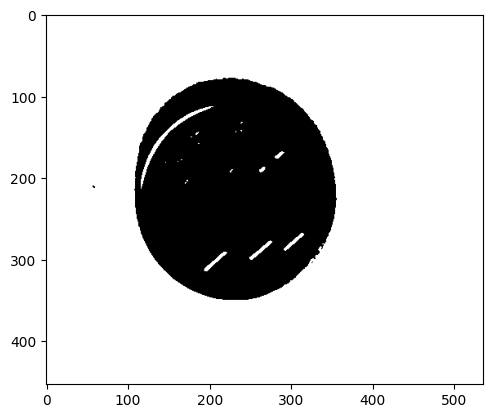

In [20]:
plt.imshow(thresholded_image, cmap='gray')


In [21]:
contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [22]:
contours = sorted(contours, key=cv2.contourArea, reverse=True)
coin_contour = contours[0]

In [23]:
rect = cv2.minAreaRect(coin_contour)
box = cv2.boxPoints(rect)
box = np.int0(box)

C:\Users\adrie\AppData\Local\Temp\ipykernel_12684\1398257350.py:3: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


In [24]:
width, height = rect[1]
coin_thickness_pixels = min(width, height)
coin_diameter_pixels = max(width, height)

In [25]:
output_path = 'image_with_contour.jpg'

cv2.imwrite(output_path, image_with_contour)

NameError: name 'image_with_contour' is not defined

In [26]:
coin_thickness_real = 1.91

conversion_factor = coin_thickness_real / coin_thickness_pixels

coin_diameter_real = coin_diameter_pixels * conversion_factor

In [27]:
coin_diameter_real

2.256504424778761

In [28]:
22.6/coin_diameter_pixels

0.042322097378277156

In [42]:
def estimate_diameter(image_path, y_limit1=800, y_limit2=height-800):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    morph_img = thresholded_image.copy()
    height, width = morph_img.shape[:2]# dimensions de l'image

    y_limit1 = height - 800 #limite
    y_limit2 = 800

    max_contour = None #contour et aire
    max_area = 0

    for cnt in contours: #on cherche dans la zone les contours
        (x, y), radius = cv2.minEnclosingCircle(cnt)
        center = (int(x), int(y))
        if (center[1] > y_limit1 or center[1] < y_limit2):
            area = cv2.contourArea(cnt)
            if area > max_area:
                max_area = area
                max_contour = cnt
                
    coin_contour = contours[0]
    rect = cv2.minAreaRect(coin_contour)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    width, height = rect[1]
    coin_thickness_pixels = min(width, height)
    coin_diameter_pixels = max(width, height)

    return coin_diameter_pixels

In [43]:
22.6/estimate_diameter(image_path)

C:\Users\adrie\AppData\Local\Temp\ipykernel_12684\381611428.py:27: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


0.042322097378277156

In [45]:
def estimate_diameter(image_path, y_limit_value=800):
    image = cv2.imread(image_path)  # Charge l'image
    if image is None:
        raise ValueError("L'image n'a pas pu être chargée.")

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    
    height, width = gray_image.shape[:2]  # dimensions de l'image

    # Limite de recherche de la pièce
    y_limit_top = height - y_limit_value  # Limite supérieure
    y_limit_bottom = y_limit_value  # Limite inférieure

    max_contour = None  # contour et aire
    max_area = 0

    # Recherche du contour dans les limites spécifiées
    for cnt in contours:
        (x, y), radius = cv2.minEnclosingCircle(cnt)
        center = (int(x), int(y))
        if y_limit_bottom < center[1] < y_limit_top:
            area = cv2.contourArea(cnt)
            if area > max_area:
                max_area = area
                max_contour = cnt

    # Calcul du rectangle englobant et du diamètre en pixels
    if max_contour is not None:
        rect = cv2.minAreaRect(max_contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        coin_diameter_pixels = max(rect[1])

        # Dessine le rectangle et le cercle sur l'image
        cv2.drawContours(image, [box], 0, (0, 255, 0), 2)
        (x, y), radius = cv2.minEnclosingCircle(max_contour)
        center = (int(x), int(y))
        cv2.circle(image, center, int(radius), (255, 0, 0), 2)

        # Enregistre l'image avec le diamètre estimé sur le disque
        cv2.imwrite(output_path, image)

        # Retourne le diamètre estimé en pixels
        return coin_diameter_pixels
    else:
        # Aucun contour n'a été trouvé dans la zone spécifiée
        return None

# Utilisation de la fonction
image_path = 'chemin_vers_votre_image.jpg'
output_path = 'image_avec_diametre.jpg'
diameter_pixels = estimate_diameter(image_path, output_path)
if diameter_pixels:
    print(f"Le diamètre estimé en pixels est : {diameter_pixels}")
else:
    print("A")


ValueError: L'image n'a pas pu être chargée.